In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import r2_score
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
df = pd.read_csv("akinator.csv")
pd.set_option("display.max.columns", None)
df.head()
df2 = df[["Taille (cm)", "Taille de pied"]].copy()
df2.loc[12, ["Taille (cm)", "Taille de pied"]] = 230, 58
df2["Y1"] = df2["Taille (cm)"] * 0.4 - 27
df2["Y2"] = df2["Taille (cm)"] * 0.9 - 120
y_mes, x = df2["Taille de pied"], df2["Taille (cm)"]
y1, y2 = df2["Y1"], df2["Y2"]

In [3]:
#from sklearn.metrics import r2_score
#r2_score(df2['Taille de pied'], df2['Y2'])
def calcul_r2(y, yi):
    r = 1 - ((y - yi)**2).sum() / ((y - y.mean())**2).sum()
    return r 
print(calcul_r2(y_mes, y1))
print(calcul_r2(y_mes, y2))

0.6870357781302716
-4.637842737366868


In [34]:
a, b = np.polyfit(x, y_mes, deg = 1)
print(a)
print(b)

0.2757268056323372
-6.285773226886919


In [38]:
X = sm.add_constant(x)
est = sm.OLS(y_mes, X).fit()
print(est.summary())
est.params
est.rsquared

                            OLS Regression Results                            
Dep. Variable:         Taille de pied   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     323.7
Date:                Thu, 24 Nov 2022   Prob (F-statistic):           8.07e-14
Time:                        10:37:27   Log-Likelihood:                -33.166
No. Observations:                  22   AIC:                             70.33
Df Residuals:                      20   BIC:                             72.51
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -6.2858      2.706     -2.323      

0.941804514583028

In [36]:
a = 0.2757
b = -6.2858 
Y3 = a*x + b
new_df = pd.DataFrame({ "Intercept" : [1, 1, 1], "Taille (cm)" : [165, 175, 185]})
est.predict(new_df) 

0    39.209150
1    41.966418
2    44.723686
dtype: float64

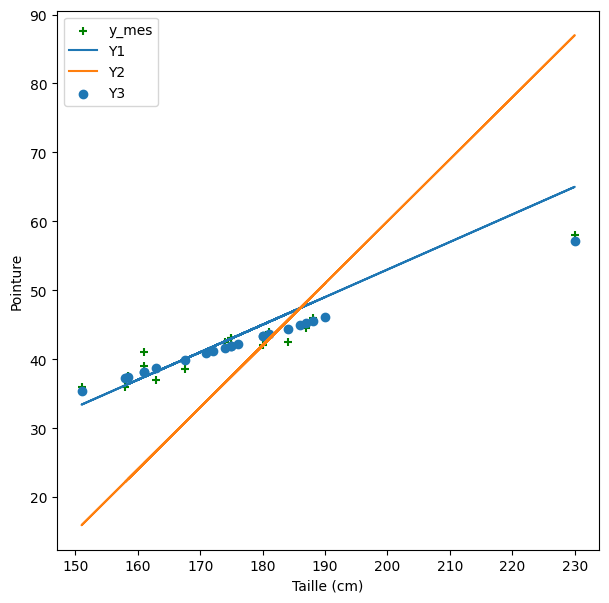

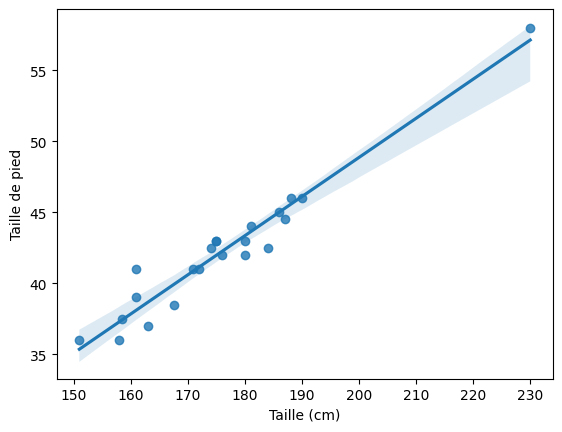

In [39]:
fig = plt.figure(figsize = (7, 7))
plt.scatter(x, y_mes, color = "green", marker = "+", label = "y_mes")
plt.plot(x, y1, label = "Y1")
plt.plot(x, y2, label = "Y2")
plt.scatter(x, Y3, label = "Y3")
plt.xlabel("Taille (cm)")
plt.ylabel("Pointure")
plt.legend()
plt.show()
sns.regplot(x = x, y = y_mes, data = df2);